# Applying TSNE

<ol> 
    <li> you need to plot 4 tsne plots with each of these feature set
        <ol>
            <li>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ol>
    </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points </font></li>
</ol>

# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 



Ans] We could use the Score/Rating. A rating of 4 or 5 could be cosnidered a positive review. A review of 1 or 2 could be considered negative. A review of 3 is nuetral and ignored. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.


## Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [1]:
#importing all the Libraries

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



import sqlite3  #it for if dataset in database to load we use sqlite3
import pandas as pd  #pandas library
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


<ul>1.First We want to Preprocess the given Text data.</ul>
<ul>2.We have Stored a preprocessed Text data and summary in a csv file to save the time.</ul>

In [2]:
data=pd.read_csv('Preprocessed_data.csv')

In [3]:
data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_reviews,preprocessed_summary
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...,b'everi book educ'
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...,b'love book miss hard cover version'
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...,b'chicken soup rice month'
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,b'great littl book read aloud nice rhythm well...,b'good swingi rhythm read aloud'
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,b'book poetri month year goe month cute littl ...,b'great way learn month'


In [4]:
Reviews=data['preprocessed_reviews']

In [5]:
Reviews.head()

0    b'witti littl book make son laugh loud recit c...
1    b'grew read sendak book watch realli rosi movi...
2    b'fun way children learn month year learn poem...
3    b'great littl book read aloud nice rhythm well...
4    b'book poetri month year goe month cute littl ...
Name: preprocessed_reviews, dtype: object

In [6]:
Reviews[0]

"b'witti littl book make son laugh loud recit car drive along alway sing refrain learn whale india droop rose love new word book introduc silli classic book will bet son still abl recit memori colleg'"

In [7]:
Summary=data['preprocessed_summary']

In [8]:
Summary.head()

0                      b'everi book educ'
1    b'love book miss hard cover version'
2              b'chicken soup rice month'
3        b'good swingi rhythm read aloud'
4                b'great way learn month'
Name: preprocessed_summary, dtype: object

In [9]:
Summary[5]

"b'charm childlik'"

# Featurization

# 1. Bag of Words

In [10]:
#Bow Representation of Reviews
from sklearn.feature_extraction.text import CountVectorizer #library for bag of word
count_vect=CountVectorizer()
#consider only  6k points
final_Bow_reviews=count_vect.fit_transform(Reviews[:6000])
print("some feature names ", count_vect.get_feature_names()[500:510])
print('='*50)
print("the type of count vectorizer ",type(final_Bow_reviews))
print("the shape of out text BOW vectorizer ",final_Bow_reviews.get_shape())
print("the number of unique words ", final_Bow_reviews.get_shape()[1])

some feature names  ['aproxim', 'apsect', 'apso', 'apt', 'aquaint', 'aquarium', 'aquir', 'ara', 'arabica', 'arbol']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (6000, 11896)
the number of unique words  11896


In [11]:
#Bow Representation of summary
from sklearn.feature_extraction.text import CountVectorizer #library for bag of word
count_vect=CountVectorizer()
#consider only 6k points
final_Bow_summary=count_vect.fit_transform(Summary[:6000])
print("some feature names ", count_vect.get_feature_names()[500:510])
print('='*50)
print("the type of count vectorizer ",type(final_Bow_summary))
print("the shape of out text BOW vectorizer ",final_Bow_summary.get_shape())
print("the number of unique words ", final_Bow_summary.get_shape()[1])

some feature names  ['clear', 'clemi', 'click', 'close', 'closest', 'clump', 'cluster', 'coal', 'coat', 'coca']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (6000, 2951)
the number of unique words  2951


In [12]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
Bow_data=hstack((final_Bow_reviews,final_Bow_summary))

In [13]:
type(Bow_data)

scipy.sparse.coo.coo_matrix

In [14]:
print("the shape of out text Bow_data vectorizer ",Bow_data.get_shape())

the shape of out text Bow_data vectorizer  (6000, 14847)


In [15]:
#load the target score is the target in our case
y=data['Score'][:6000].values.reshape(-1,1)
y.shape

(6000, 1)

In [16]:
final_Bow_reviews=final_Bow_reviews.todense()

In [17]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(final_Bow_reviews)
print(standardized_data.shape)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(6000, 11896)


## Applying TNSE on Text BOW vectors

In [18]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=0, perplexity=100, learning_rate=200)
#configuring the parameters
#the number of components=2
#Default perplexity=30
#Default learning_rate=200
#Default Maximum number of iterations for optimization=1000

#here we are considering the featurized Bow_reviews
X_embedding = tsne.fit_transform(standardized_data)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix


C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


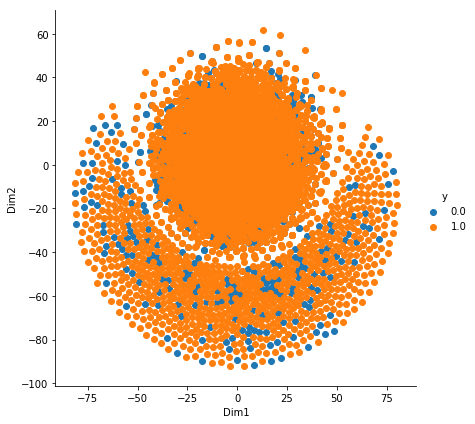

In [19]:
#we can use Either this code to plot
#for_tsne = np.hstack((X_embedding, y))
#for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
#colors = {0:'red', 1:'blue'}
#plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
#plt.show()

#we can also use this command also
tsne_data = np.hstack((X_embedding, y))

# creating a new data fram which help us in ploting the result data
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "y"))

#plotting the result tsne
sns.FacetGrid(tsne_df, hue="y", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [20]:
tsne=TSNE(n_components=2,n_iter=3000,random_state=0, perplexity=200, learning_rate=500)
#configuring the parameters
#the number of components=2
#Default perplexity=30
#Default learning_rate=200
#Default Maximum number of iterations for optimization=1000

#here we are considering the featurized Bow_summary
X_embedding = tsne.fit_transform(StandardScaler().fit_transform(final_Bow_summary.todense()))
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


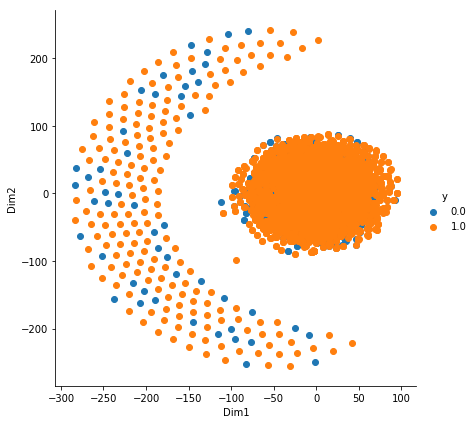

In [21]:
#we can also use this command also
tsne_data = np.hstack((X_embedding, y))

# creating a new data fram which help us in ploting the result data
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "y"))

#plotting the result tsne
sns.FacetGrid(tsne_df, hue="y", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [22]:
#Bow representation using Bigram
#bi-gram, tri-gram and n-gram
#we used only 6000 points beause we have memory error
#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_review_counts = count_vect.fit_transform(Reviews[:6000])
print("the type of count vectorizer ",type(final_bigram_review_counts))
print("the shape of out text BOW vectorizer ",final_bigram_review_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_review_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (6000, 3903)
the number of unique words including both unigrams and bigrams  3903


In [23]:
#tsne on final_bigram_review_counts
tsne=TSNE(n_components=2,n_iter=3000, random_state=0, perplexity=100, learning_rate=200)
#configuring the parameters
#the number of components=2
#Default perplexity=30
#Default learning_rate=200
#Default Maximum number of iterations for optimization=1000

#here we are considering the featurized Bow_summary
X_embedding = tsne.fit_transform(StandardScaler().fit_transform(final_bigram_review_counts.todense()))
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


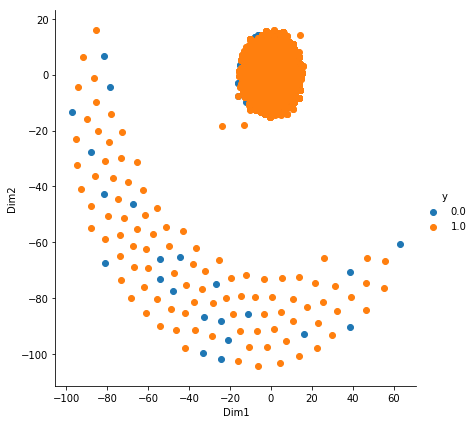

In [24]:
#we can also use this command also
tsne_data = np.hstack((X_embedding, y))

# creating a new data fram which help us in ploting the result data
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "y"))

#plotting the result tsne
sns.FacetGrid(tsne_df, hue="y", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

# TF-IDF

In [25]:
#applying tf_idf to the 

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(Reviews[:6000])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(Reviews[:6000])
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['abil', 'abl', 'abl find', 'abl get', 'absolut', 'absolut best', 'absolut favorit', 'absolut love', 'absorb', 'accent']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (6000, 3903)
the number of unique words including both unigrams and bigrams  3903


##  Applying TNSE on Text TFIDF vectors

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


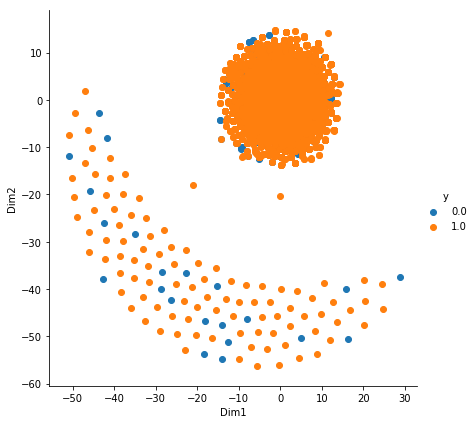

In [26]:
tsne=TSNE(n_components=2,random_state=0, perplexity=100, learning_rate=200)
#configuring the parameters
#the number of components=2
#Default perplexity=30
#Default learning_rate=200
#Default Maximum number of iterations for optimization=1000

#here we are considering the featurized Bow_summary
X_embedding = tsne.fit_transform(StandardScaler().fit_transform(final_bigram_review_counts.todense()))
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix
#we can also use this command also
tsne_data = np.hstack((X_embedding, y))

# creating a new data fram which help us in ploting the result data
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "y"))

#plotting the result tsne
sns.FacetGrid(tsne_df, hue="y", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

# Word2Vec

In [27]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in Reviews[:6000]:
    list_of_sentance.append(sentance.split())

In [28]:
list_of_sentance[0]

["b'witti",
 'littl',
 'book',
 'make',
 'son',
 'laugh',
 'loud',
 'recit',
 'car',
 'drive',
 'along',
 'alway',
 'sing',
 'refrain',
 'learn',
 'whale',
 'india',
 'droop',
 'rose',
 'love',
 'new',
 'word',
 'book',
 'introduc',
 'silli',
 'classic',
 'book',
 'will',
 'bet',
 'son',
 'still',
 'abl',
 'recit',
 'memori',
 "colleg'"]

In [29]:
# Using Google News Word2Vectors

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W17SRFAzZPY
# you can comment this whole cell
# or change these varible according to your need

is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

[('good', 0.9856923222541809), ('low', 0.9753363728523254), ('much', 0.9733806252479553), ('varieti', 0.9720892310142517), ('protein', 0.9702966809272766), ("syrup'", 0.9674618244171143), ('philipin', 0.9663530588150024), ('definit', 0.9653623104095459), ('filler', 0.9644958972930908), ('carb', 0.9625887870788574)]
[('horribl', 0.999390184879303), ('fur', 0.9992915391921997), ('mean', 0.9992591142654419), ('either', 0.999186635017395), ('bodi', 0.9991692304611206), ('accord', 0.9991416335105896), ('incred', 0.9991356134414673), ('fantast', 0.9991302490234375), ('word', 0.9991185665130615), ('nut', 0.9990829229354858)]


In [30]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  4409
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'learn', 'india', 'rose', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', "b'grew", 'read', 'sendak', 'watch', 'realli', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand', 'keep', 'page', "open'", 'way', 'children', 'month', 'year']


In [31]:
all_vocab = list(w2v_model.wv.vocab.keys())
data_dict = {word: w2v_model.wv[word] for word in all_vocab}
result = pd.DataFrame(data=data_dict).transpose()

In [32]:
result.values

array([[-0.41224134,  0.00451252,  0.1062529 , ..., -0.4302118 ,
         0.14705606, -0.06761362],
       [-0.19662412,  0.34371504,  0.33176365, ..., -0.44280896,
         0.11839022, -0.00218419],
       [-0.43378225, -0.090179  , -0.11189607, ..., -0.47268134,
         0.03661653,  0.42104122],
       ...,
       [-0.02332493,  0.02449621,  0.02776565, ..., -0.05349266,
         0.02288517,  0.01731417],
       [-0.11289832,  0.14251128,  0.12034754, ..., -0.20132768,
         0.04402674,  0.04659   ],
       [-0.04439113,  0.06083358,  0.03393262, ..., -0.07767353,
         0.01348151,  0.01955427]], dtype=float32)

#  Applying TNSE on Text  W2V vectors

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


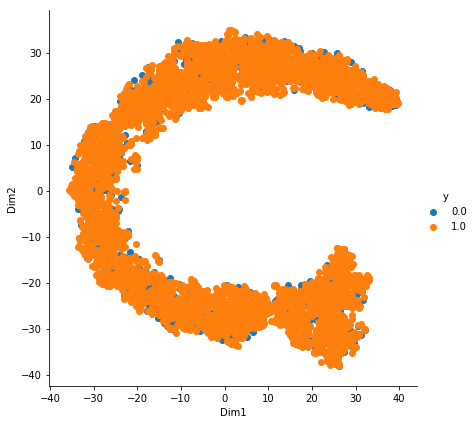

In [33]:
tsne=TSNE(n_components=2,random_state=0, perplexity=100, learning_rate=200)
#configuring the parameters
#the number of components=2
#Default perplexity=30
#Default learning_rate=200
#Default Maximum number of iterations for optimization=1000

#here we are considering the featurized Bow_summary
X_embedding = tsne.fit_transform(result.values)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix
#we can also use this command also
#load the target score is the target in our case
y=data['Score'][:X_embedding.shape[0]].values.reshape(-1,1)
y.shape
tsne_data = np.hstack((X_embedding, y))

# creating a new data fram which help us in ploting the result data
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "y"))

#plotting the result tsne
sns.FacetGrid(tsne_df, hue="y", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [34]:
X_embedding.shape[0]

4409

 # Converting text into vectors using wAvg W2V

In [35]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:14<00:00, 409.18it/s]


6000
50


# Applying TNSE on Text Avg W2V vectors

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


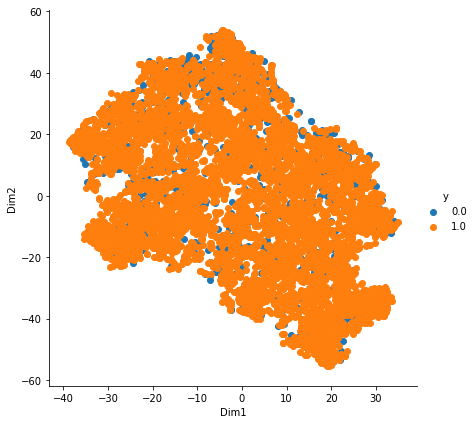

In [37]:
tsne=TSNE(n_components=2,random_state=0, perplexity=100, learning_rate=200)
#configuring the parameters
#the number of components=2
#Default perplexity=30
#Default learning_rate=200
#Default Maximum number of iterations for optimization=1000

#load the target score is the target in our case
y=data['Score'][:X_embedding.shape[0]].values.reshape(-1,1)

X_embedding = tsne.fit_transform(sent_vectors)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix
#we can also use this command also
tsne_data = np.hstack((X_embedding, y))

# creating a new data fram which help us in ploting the result data
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "y"))

#plotting the result tsne
sns.FacetGrid(tsne_df, hue="y", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

 # Converting text into vectors TFIDF weighted W2v

Converting Text Features in to vectors using TFIDF Weighted W2V

In [38]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(data['preprocessed_reviews'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [39]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [11:40<00:00,  8.57it/s]


# Applying TNSE on Text TFIDF weighted W2V vectors

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


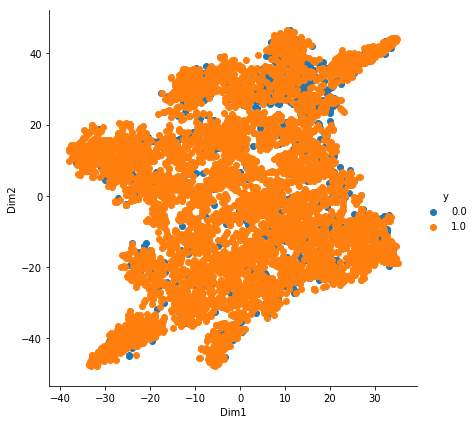

In [40]:
tsne=TSNE(n_components=2,random_state=0, perplexity=100, learning_rate=200)
#configuring the parameters
#the number of components=2
#Default perplexity=30
#Default learning_rate=200
#Default Maximum number of iterations for optimization=1000

#load the target score is the target in our case
y=data['Score'][:X_embedding.shape[0]].values.reshape(-1,1)

X_embedding = tsne.fit_transform(tfidf_sent_vectors)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix
#we can also use this command also
tsne_data = np.hstack((X_embedding, y))

# creating a new data fram which help us in ploting the result data
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "y"))

#plotting the result tsne
sns.FacetGrid(tsne_df, hue="y", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

# Conclusions

1. In Bow representation we can see that our data is sparse compared to the word2vec text features.
2. In Word2vec and avg Word2vec representation we can see that our data is dense.
3. No hyperplane can be drawn which can differentiate positive and negative reviews. 
4. so we want to build a model using algorithms.